# Data exploration
In this section, explore which features of the dataset contribute to the car's price.

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sb

C:\Users\deric\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Set data directory

data_dir = 'data'

if not os.path.exists(data_dir):
    os.mkdir(data_dir)

First, we decompress the ZIP file that contains our dataset. This dataset was taken from Kaggle. It contains data on used cars listing on Craigslist. To be exact, we will be using Version 4 of the dataset.

Link to the dataset page: https://www.kaggle.com/austinreese/craigslist-carstrucks-data.

In [5]:
!unzip craigslist-carstrucks-data.zip -d $data_dir

Archive:  craigslist-carstrucks-data.zip
  inflating: data/vehicles.csv       


In [6]:
# Read in data

data = pd.read_csv(os.path.join(data_dir, 'vehicles.csv'))

data.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7034441763,https://saltlakecity.craigslist.org/cto/d/salt...,salt lake city,https://saltlakecity.craigslist.org,17899,2012.0,volkswagen,golf r,excellent,4 cylinders,...,4wd,compact,hatchback,black,https://images.craigslist.org/00G0G_fTLDWM5Xyv...,PRICE REDUCED! -Garage kept -Low Miles (63K)...,NaN,ut,40.7372,-111.858
1,7034440610,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,...,4wd,NaN,NaN,NaN,https://images.craigslist.org/00v0v_7Cu0buIofU...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
2,7034440588,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,46463,2015.0,gmc,sierra 1500,excellent,NaN,...,4wd,NaN,NaN,white,https://images.craigslist.org/01515_lPvJ9bfbdY...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
3,7034440546,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,...,4wd,NaN,NaN,NaN,https://images.craigslist.org/00T0T_6Rjfp3NS4O...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
4,7034406932,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,49999,2018.0,ford,f-450,NaN,NaN,...,4wd,NaN,pickup,white,https://images.craigslist.org/00W0W_8yIUwRBXXd...,2018 Ford F-350 F350 F 350 SD Lariat Crew Cab ...,NaN,ut,40.3744,-104.694


## Data clean-up
Drop rows whose year and price values are zero or null. We will also drop columns that we will not be using for exploration. We arrived at these columns based on common sense and knowledge that columns like id, url, lat, long, etc. are very unlikely to affect he car's price.

The cylinders column will also be dropped. Although this column is more closely associated with car specifications than the others that were dropped, we will be working under the knowledge that most car owners do not take the number of cylinders into account when determining a price for their car.

In [66]:
df = data[data['price'] != 0]
df = df.dropna(subset=['year', 'manufacturer', 'model'])

df = df.drop(columns=['id', 'url', 'region', 'region_url', 'title_status', 'vin',
                      'image_url', 'description', 'county', 'lat', 'long', 'state', 
                      'cylinders'])

df.head()

,price,year,manufacturer,model,condition,fuel,odometer,transmission,drive,size,type,paint_color
0,17899,2012.0,volkswagen,golf r,excellent,gas,63500.0,manual,4wd,compact,hatchback,black
2,46463,2015.0,gmc,sierra 1500,excellent,gas,7554.0,automatic,4wd,NaN,NaN,white
4,49999,2018.0,ford,f-450,NaN,diesel,70150.0,automatic,4wd,NaN,pickup,white
6,34500,2017.0,ford,f-350,NaN,diesel,95484.0,automatic,4wd,NaN,pickup,white
7,14500,2007.0,gmc,sierra,NaN,gas,89340.0,automatic,4wd,NaN,pickup,NaN


### Data filtering
Take only the entries that were posted from 2015 to 2019 and plot the distribution of data to within these years.

In [67]:
years = [2015, 2016, 2017, 2018, 2019]

df = df[df['year'].isin(years)]

df.head()

,price,year,manufacturer,model,condition,fuel,odometer,transmission,drive,size,type,paint_color
2,46463,2015.0,gmc,sierra 1500,excellent,gas,7554.0,automatic,4wd,NaN,NaN,white
4,49999,2018.0,ford,f-450,NaN,diesel,70150.0,automatic,4wd,NaN,pickup,white
6,34500,2017.0,ford,f-350,NaN,diesel,95484.0,automatic,4wd,NaN,pickup,white
13,27999,2015.0,gmc,sierra,NaN,gas,73612.0,automatic,4wd,NaN,pickup,brown
16,35500,2015.0,gmc,sierra,NaN,diesel,127515.0,automatic,4wd,NaN,pickup,black


Save filtered dataset in case we need to load it in again in the future.

In [9]:
df.to_csv(os.path.join(data_dir, 'vehicles_filtered.csv'), index=False)

In [11]:
# Set data directory

fig_dir = 'fig'

if not os.path.exists(fig_dir):
    os.mkdir(fig_dir)

122655


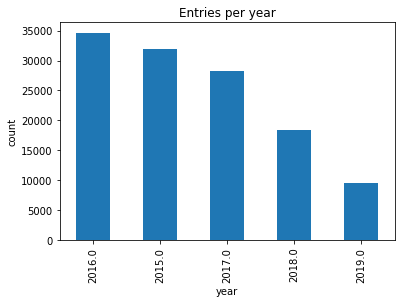

In [68]:
print(df.shape[0])
df['year'].value_counts().plot(kind='bar')
plt.xlabel('year')
plt.ylabel('count')
plt.title('Entries per year')
plt.savefig(os.path.join(fig_dir, 'entries_per_year.jpg'), bbox_inches='tight')

The year column in our dataset does not correlate to the car's price because the year column here is actually the year the car was posted on Craigslist; not the actual year the car was bought or manufactured. Thus, this imbalance of distribution can be ignored.

After filtering the dataset by year, we can drop the year column.

In [69]:
df = df.drop(columns=['year'])

### Car model feature
The model feature requires additional clean-up. This is because unlike other features, the model column's exact text value can vary greatly depending on the poster's prerogative. For example, a car's actual model can be 'cruze' but the poster might opt to put in 'cruze automatic' instead which is essentially the same category but, if unhandled, will result to its own separate category. This can be seen by simply viewing the raw model feature values.

In [14]:
df['model'].value_counts()

f-150                    3128
1500                     2548
silverado 1500           2201
2500                     1355
altima                   1351
                         ... 
rogue sv automatic          1
escalade premium awd        1
transit-250 cutaway         1
tlx v6 w/tech               1
patriot sport 4x4 suv       1
Name: model, Length: 8897, dtype: int64

In [15]:
model_counts = df['model'].value_counts()

model_counts = model_counts[model_counts < 50] # Estimate to show redundant categories

model_counts

patriot sport              49
tucson se sport utility    49
outback 2.5i limited       49
focus se hatchback 4d      49
elantra gt                 48
                           ..
rogue sv automatic          1
escalade premium awd        1
transit-250 cutaway         1
tlx v6 w/tech               1
patriot sport 4x4 suv       1
Name: model, Length: 8535, dtype: int64

In order to remedy this, we will use containment to normalize redundant model classes. The methods below will normalize the model values into the shortest and most indicative model value. So 'cruze 2017 AT' will simply be normalized to 'cruze'. If we do not do this, our network will treat these two values as separate values which will likely lead to it not training as well due to a very high number of unique values of the model feature.

In [16]:
import re
from sklearn.feature_extraction.text import CountVectorizer

token_pattern = r'(?!19|20\d{2})\b[a-zA-Z0-9-.]+'

def calculate_containment(answer, source, n):    
    match = re.search(token_pattern, source)
    
    if not match:
        return 0
    
    counts = CountVectorizer(ngram_range=(1,n),
                             token_pattern=token_pattern) # Exclude year in model
    
    ngram_array = counts.fit_transform([answer, source]).toarray()
    
    intersections = [min(c, ngram_array[1][i]) for i, c in enumerate(ngram_array[0])]
    
    source_sum = np.sum(ngram_array[0])
    
    containment = np.sum(intersections) / np.sum(ngram_array[0]) if source_sum > 0 else 0
    
    return containment

In [17]:
def clean_model_feature(df_to_clean):    
    # Account for '-' only filler for model feature value
    df_to_clean[df_to_clean['model'] == '-'] = np.nan
    
    df_to_clean.dropna(subset=['model'], inplace=True)
    
    model_word_count = []
    
    for i in range(len(df_to_clean)):
        model = df_to_clean.iloc[i]['model']
        model_word_count.append(len(model.split()))
    
    df_to_clean['model_word_count'] = model_word_count
    
    df_to_clean.sort_values(by='model_word_count', inplace=True)
    
    model_manufacturer_classes = {}
    
    print_every = 10000
    
    df_len = len(df_to_clean)
    
    new_models = []
    
    for i in range(df_len):
        if i % print_every == 0:
            print('Processing row {}/{}'.format(i + 1, df_len))
            
        if df_to_clean.iloc[i]['model_word_count'] < 1:
            new_models.append('')
            
            continue
        
        model = df_to_clean.iloc[i]['model'].lower().replace('-', '')
        
        manufacturer = df_to_clean.iloc[i]['manufacturer']
        
        if manufacturer not in model_manufacturer_classes:
            model_manufacturer_classes[manufacturer] = []
            
        model_classes = model_manufacturer_classes[manufacturer]
        
        match_model_class = None
        
        for model_class in model_classes:
            if model == model_class:
                match_model_class = model
                break
            
            model_class_len = len(model_class.split())
            
            containment = calculate_containment(model, model_class, model_class_len)
            
            model_len = len(re.findall(token_pattern, model))
            
            if model_len == 0:
                continue
            
            if containment >= model_class_len / model_len:
                match_model_class = model_class
                break
                
        if match_model_class is None:
            match_model_class = model
            model_classes.append(model)
        
        new_models.append(match_model_class)
        
    df_to_clean['model'] = new_models

In [18]:
clean_model_df = df.copy()

clean_model_feature(clean_model_df)

clean_model_df = clean_model_df.drop(columns=['model_word_count'])

clean_model_df

Processing row 1/122654
Processing row 10001/122654
Processing row 20001/122654
Processing row 30001/122654
Processing row 40001/122654
Processing row 50001/122654
Processing row 60001/122654
Processing row 70001/122654
Processing row 80001/122654
Processing row 90001/122654
Processing row 100001/122654
Processing row 110001/122654
Processing row 120001/122654


,price,manufacturer,model,condition,fuel,odometer,transmission,drive,size,type,paint_color
509574,24895.0,jeep,cherokee,NaN,gas,6973.0,automatic,4wd,NaN,SUV,white
183618,12999.0,nissan,altima,NaN,gas,63810.0,NaN,fwd,NaN,sedan,NaN
183628,12799.0,hyundai,elantra,NaN,gas,80210.0,automatic,NaN,NaN,sedan,silver
183636,42738.0,cadillac,atsv,NaN,gas,NaN,manual,NaN,NaN,NaN,NaN
183671,17850.0,ford,f150,NaN,gas,76393.0,automatic,rwd,NaN,NaN,white
...,...,...,...,...,...,...,...,...,...,...,...
200726,33064.0,ram,1500,NaN,gas,42920.0,automatic,4wd,NaN,NaN,black
70491,27987.0,toyota,tacoma,NaN,NaN,44444.0,automatic,rwd,NaN,NaN,NaN
421554,32663.0,chevrolet,traverse,NaN,gas,18498.0,automatic,4wd,NaN,SUV,silver
422297,22986.0,chevrolet,equinox,NaN,gas,21598.0,automatic,4wd,NaN,SUV,white


Save cleaned dataframe for loading later.

In [19]:
clean_model_df.to_csv(os.path.join(data_dir, 'vehicles_model.csv'), index=False)

To further simplify our dataset and trim out outliers, we will be dropping rows whose model value occurs in the dataset less than 50 times.

In [20]:
model_counts = clean_model_df['model'].value_counts()

remove_threshold = 50

trimmed_df = clean_model_df[clean_model_df['model'].isin(model_counts[model_counts > remove_threshold].index)]

trimmed_df.to_csv(os.path.join(data_dir, 'vehicles_trimmed.csv'), index=False)

Delete _vehicles.csv_ since we don't longer need it.

In [21]:
!rm $data_dir/vehicles.csv

## Feature-price correlation
Here we explore how each feature is correlated, if at all, to the car's _price_.

Features to be explored are:
1. manufacturer
2. odometer
3. transmission
4. paint_color
5. fuel
6. type
7. drive
8. size
9. condition

We will also be filling null values in these categories with 'other' since it is what is used in the dataset for nominal features whose entry's value for does not fall under the more common values for the feature.

In [22]:
trimmed_df[['transmission', 'paint_color','fuel', 'type', 'drive', 'size', 'condition']] = \
    trimmed_df[['transmission', 'paint_color', 'fuel', 'type', 'drive', 'size', 'condition']].fillna('other')

trimmed_df

C:\Users\deric\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,price,manufacturer,model,condition,fuel,odometer,transmission,drive,size,type,paint_color
509574,24895.0,jeep,cherokee,other,gas,6973.0,automatic,4wd,other,SUV,white
183618,12999.0,nissan,altima,other,gas,63810.0,other,fwd,other,sedan,other
183628,12799.0,hyundai,elantra,other,gas,80210.0,automatic,other,other,sedan,silver
183671,17850.0,ford,f150,other,gas,76393.0,automatic,rwd,other,other,white
183682,24150.0,dodge,challenger,other,gas,74540.0,automatic,rwd,other,coupe,white
...,...,...,...,...,...,...,...,...,...,...,...
200726,33064.0,ram,1500,other,gas,42920.0,automatic,4wd,other,other,black
70491,27987.0,toyota,tacoma,other,other,44444.0,automatic,rwd,other,other,other
421554,32663.0,chevrolet,traverse,other,gas,18498.0,automatic,4wd,other,SUV,silver
422297,22986.0,chevrolet,equinox,other,gas,21598.0,automatic,4wd,other,SUV,white


To help plot the correlation of each feature to the price, we will use the below function. This function will utilize a boxplot to show a summary of each feature value's price distribution.

In [70]:
def plot_correlation(df, feature, fig_size=(6.4, 4.8), ylim=(2500, 1e5), title=None, filename=None):
    plt.figure(figsize=fig_size)

    sb.boxplot(data = df, x = feature, y = 'price')
    plt.ylabel('price (USD)')    
    plt.xticks(rotation=45)
    
    if ylim is not None:
        plt.ylim(ylim)
    
    if title is not None:
        plt.title(title)
        
    if filename is not None:
        plt.savefig(filename, bbox_inches='tight')

First, we plot the manufacturer column as-is - without any y-axis limit.

We can see from below that the plot barely makes any sense but upon further inspection, we notice that this plot is actually caused by very extreme outliers in the data. These extreme outliers squish the normal data so far down the plot that they become essentially unrecognizable.

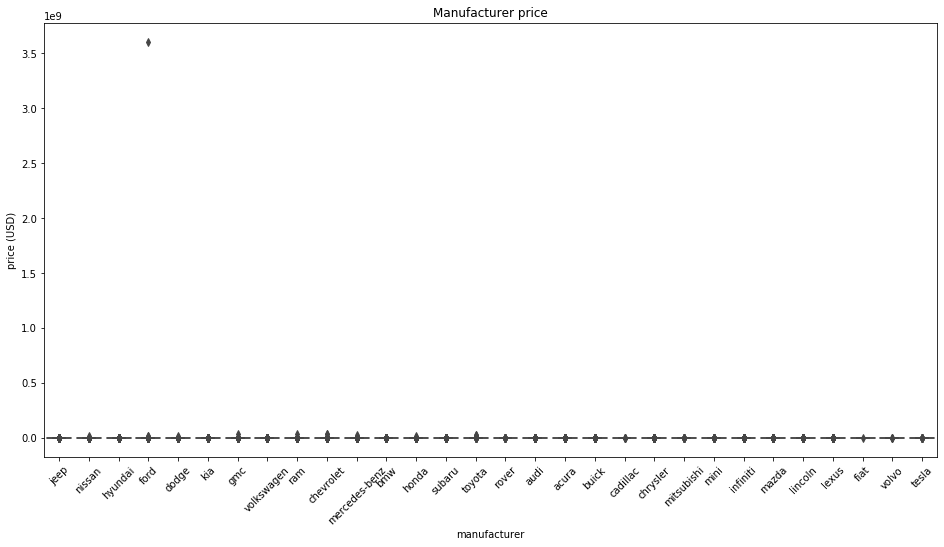

In [71]:
plot_correlation(trimmed_df, 'manufacturer', fig_size=(16,8), ylim=None, 
                 title='Manufacturer price', filename=os.path.join(fig_dir, 'manufacturer_price_no_lim.jpg'))

To avoid this, we will use _plot_correlation_ function's default _ylim_ argument that limits the plot's y-axis from 2500 to 100000. We decided on these limits based on real world range of car prices. Although there are cars that cost way beyond USD100000, these are most likely luxury and custom cars which we can afford to ignore since the goal of this project is to build a model that accurately estimates cars posted on Craigslist - most of which are common, non-luxury cars.

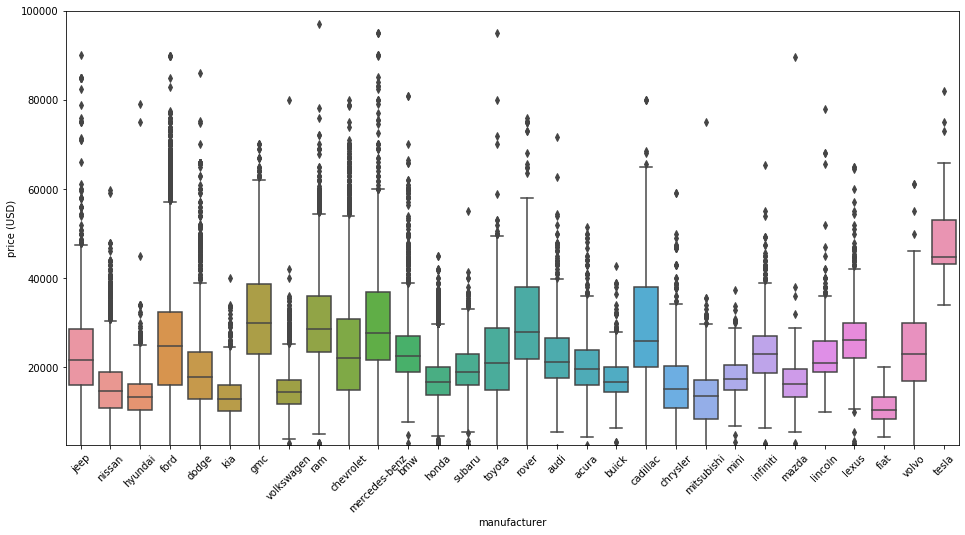

In [72]:
plot_correlation(trimmed_df, 'manufacturer', fig_size=(16,8), filename=os.path.join(fig_dir, 'manufacturer_price.jpg'))

We remove said outliers from the dataset. We will also remove outliers under the odometer column.

In [73]:
cut_df = trimmed_df[trimmed_df['price'] > 2500]
cut_df = cut_df[cut_df['price'] <= 1e5]
cut_df = cut_df[cut_df['odometer'] <= 2e5]

cut_df.to_csv(os.path.join(data_dir, 'vehicles_cut.csv'), index=False)

Directly plotting each feature against the price does not make much sense since we know the car prices are predominantly determined by the car model before anything else. This can be observed in the plot below where we only plot car models under the Chevrolet brand.

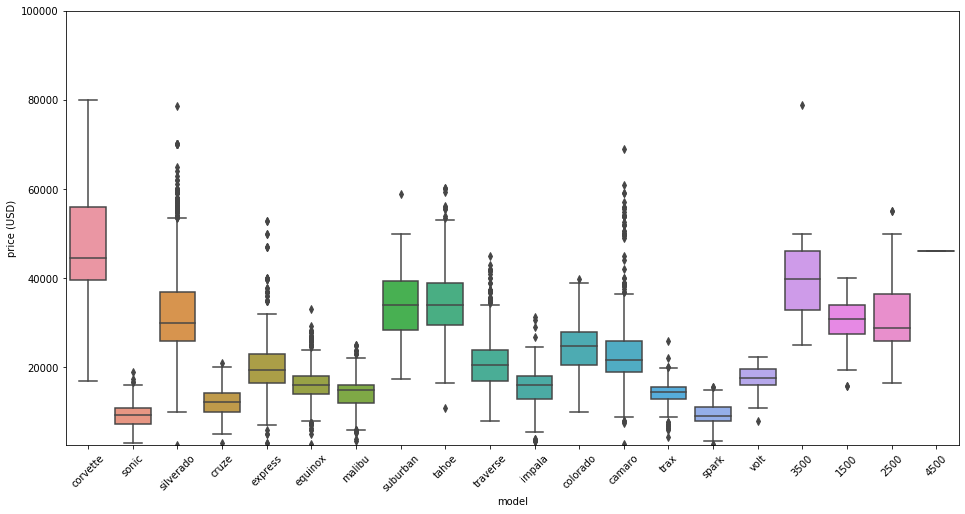

In [74]:
chevrolet_df = cut_df[cut_df['manufacturer'] == 'chevrolet']

plot_correlation(chevrolet_df, 'model', fig_size=(16,8), filename=os.path.join(fig_dir, 'chevrolet_price.jpg'))

Given that the car's model is ultimately the biggest contributor to the price, keeping the manufacturer as a separate feature does not make much sense and doing so would only confuse the model we are building. So, we will just concatenate the manufacturer and model value into the model column then drop the manufacturer column.

In [75]:
concat_df = cut_df.copy()

concat_df['model'] = concat_df['manufacturer'] + '-' + concat_df['model']

concat_df.drop(columns=['manufacturer'], inplace=True)

Now that we can isolate each car model, we can plot its features correlation to the price and clearly distinguish the contributing features. For this example, we will stick with the car model used above - Chevrolet Cruze.

In [76]:
cruze_df = concat_df[concat_df['model'] == 'chevrolet-cruze']

cruze_df

,price,model,condition,fuel,odometer,transmission,drive,size,type,paint_color
380774,12900.0,chevrolet-cruze,other,gas,62361.0,automatic,fwd,other,sedan,blue
380624,9895.0,chevrolet-cruze,excellent,gas,78351.0,automatic,fwd,other,sedan,black
180724,11995.0,chevrolet-cruze,good,gas,87345.0,automatic,rwd,compact,sedan,green
382234,13000.0,chevrolet-cruze,excellent,gas,65000.0,automatic,fwd,other,hatchback,blue
180353,8777.0,chevrolet-cruze,other,gas,65552.0,automatic,other,compact,sedan,silver
...,...,...,...,...,...,...,...,...,...,...
476702,12499.0,chevrolet-cruze,other,gas,48430.0,automatic,fwd,other,sedan,grey
150688,13468.0,chevrolet-cruze,other,other,38665.0,automatic,fwd,other,sedan,grey
396345,14925.0,chevrolet-cruze,other,other,23401.0,automatic,fwd,other,sedan,custom
396357,8950.0,chevrolet-cruze,other,other,116819.0,automatic,fwd,other,sedan,other


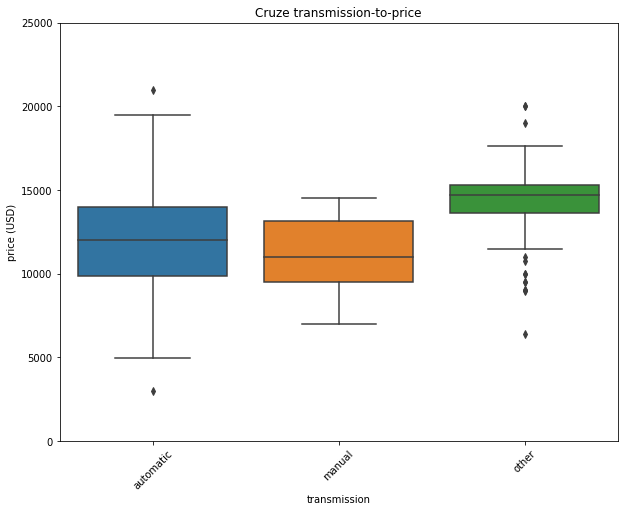

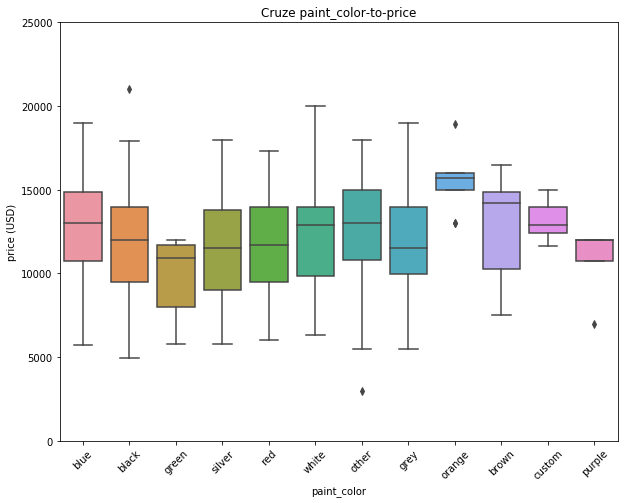

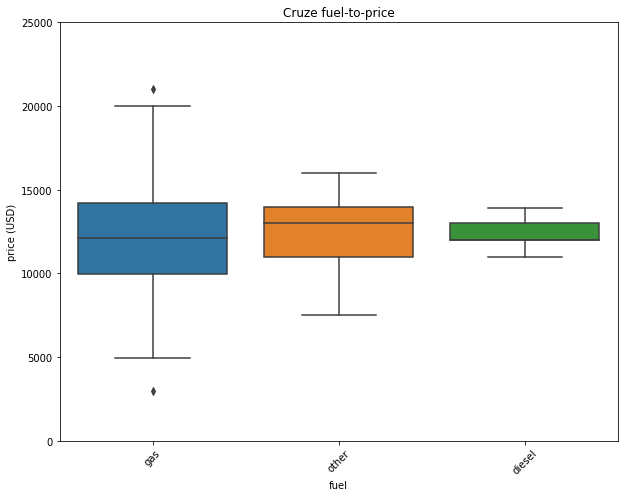

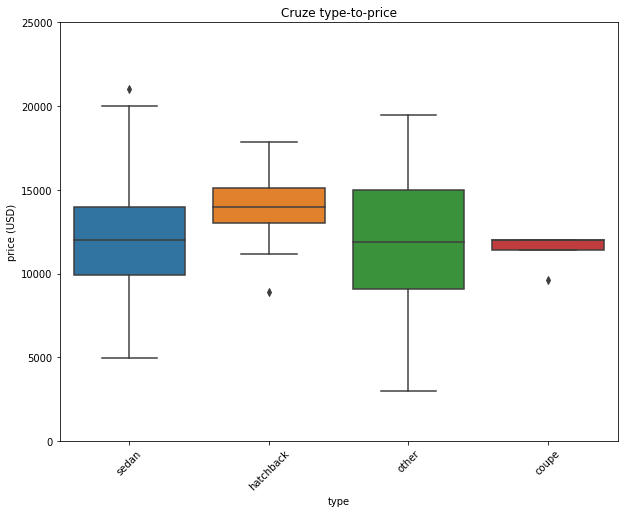

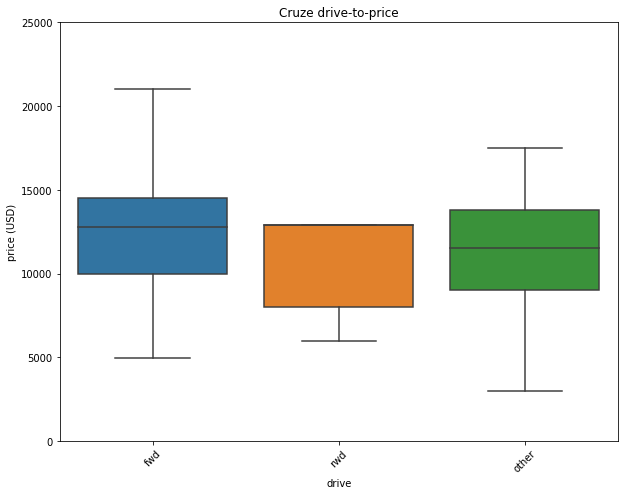

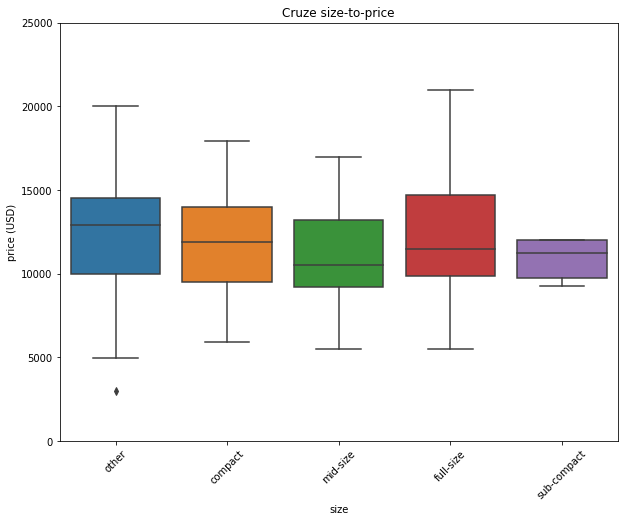

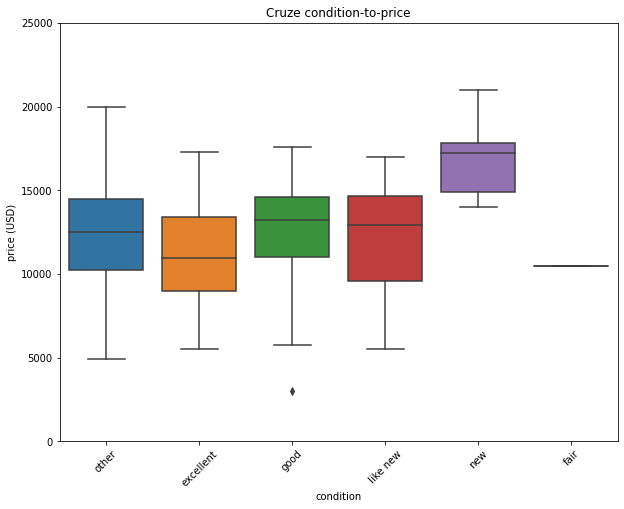

In [77]:
correlation_features = ['transmission', 'paint_color', 'fuel', 'type', 'drive', 'size', 'condition']

for feature in correlation_features:
    plot_correlation(cruze_df, feature, title='Cruze {}-to-price'.format(feature), ylim=(0, 25000),
                     fig_size=(10, 7.7), filename=os.path.join(fig_dir, 'cruze_{}_price.jpg'.format(feature)))

We should also plot the odometer-to-price correlation. For this numerical feature, we will utilize a scatterplot.

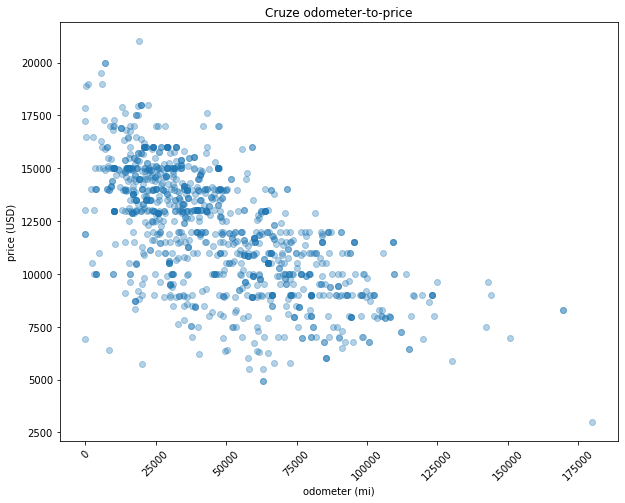

In [78]:
plt.figure(figsize=(10, 7.7))
plt.scatter(data=cruze_df, x='odometer', y='price', alpha=1/3)
plt.ylabel('price (USD)')
plt.xlabel('odometer (mi)')
plt.xticks(rotation=45)
plt.title('Cruze odometer-to-price')
plt.savefig(os.path.join(fig_dir, 'cruze_odometer_price.jpg'), bbox_inches='tight')

After careful observation, we can conclude that all of the above features affect the price given the distance of each feature's classes' from each other - all except the drive feature. The drive feature's class medians are close to each other compared to the others so it is safe to assume that this feature does not affect the price as much and can be dropped.

In [79]:
concat_df = concat_df.drop(columns='drive')

concat_df.to_csv(os.path.join(data_dir, 'vehicles_concat.csv'), index=False)

concat_df

,price,model,condition,fuel,odometer,transmission,size,type,paint_color
509574,24895.0,jeep-cherokee,other,gas,6973.0,automatic,other,SUV,white
183618,12999.0,nissan-altima,other,gas,63810.0,other,other,sedan,other
183628,12799.0,hyundai-elantra,other,gas,80210.0,automatic,other,sedan,silver
183671,17850.0,ford-f150,other,gas,76393.0,automatic,other,other,white
183682,24150.0,dodge-challenger,other,gas,74540.0,automatic,other,coupe,white
...,...,...,...,...,...,...,...,...,...
200726,33064.0,ram-1500,other,gas,42920.0,automatic,other,other,black
70491,27987.0,toyota-tacoma,other,other,44444.0,automatic,other,other,other
421554,32663.0,chevrolet-traverse,other,gas,18498.0,automatic,other,SUV,silver
422297,22986.0,chevrolet-equinox,other,gas,21598.0,automatic,other,SUV,white


## Categorical features distribution
Here we explore how balanced or imbalanced the distribution of our categorical features' classes are.

Features to be explored are:
1. model
2. transmission
3. paint_color
4. fuel
5. type
6. size
7. condition

We will use the function below, _plot_class_distribution_, to plot each nominal feature's distribution within the dataset.

In [5]:
import math

def plot_class_distribution(df, feature, fig_size=(6.4, 4.8), others_threshold=10, kind='bar', filename=None):
    counts = df[feature].value_counts(ascending=True)

    mask = counts[counts < others_threshold]
    others_count = mask.sum()

    if others_count > 0:
        counts = counts[counts >= others_threshold]
        counts = counts.sort_values(0)
        counts.loc['others'] = others_count

    plt.figure(figsize=fig_size)
    plt.ylabel(feature)
    plt.xlabel('count')
    plt.title('{} class distribution'.format(feature.capitalize()))

    counts.plot(kind=kind)
    
    if filename is not None:
        plt.savefig(filename, bbox_inches='tight')

First, we plot the car model distribution. From the plot below, it is evident that the model distribution is severely imbalanced. This imbalance may affect the model we are building and may make it biased towards models with high occurrence. This problem can be tackled with sampling option which we will address in the pre-processing notebook.

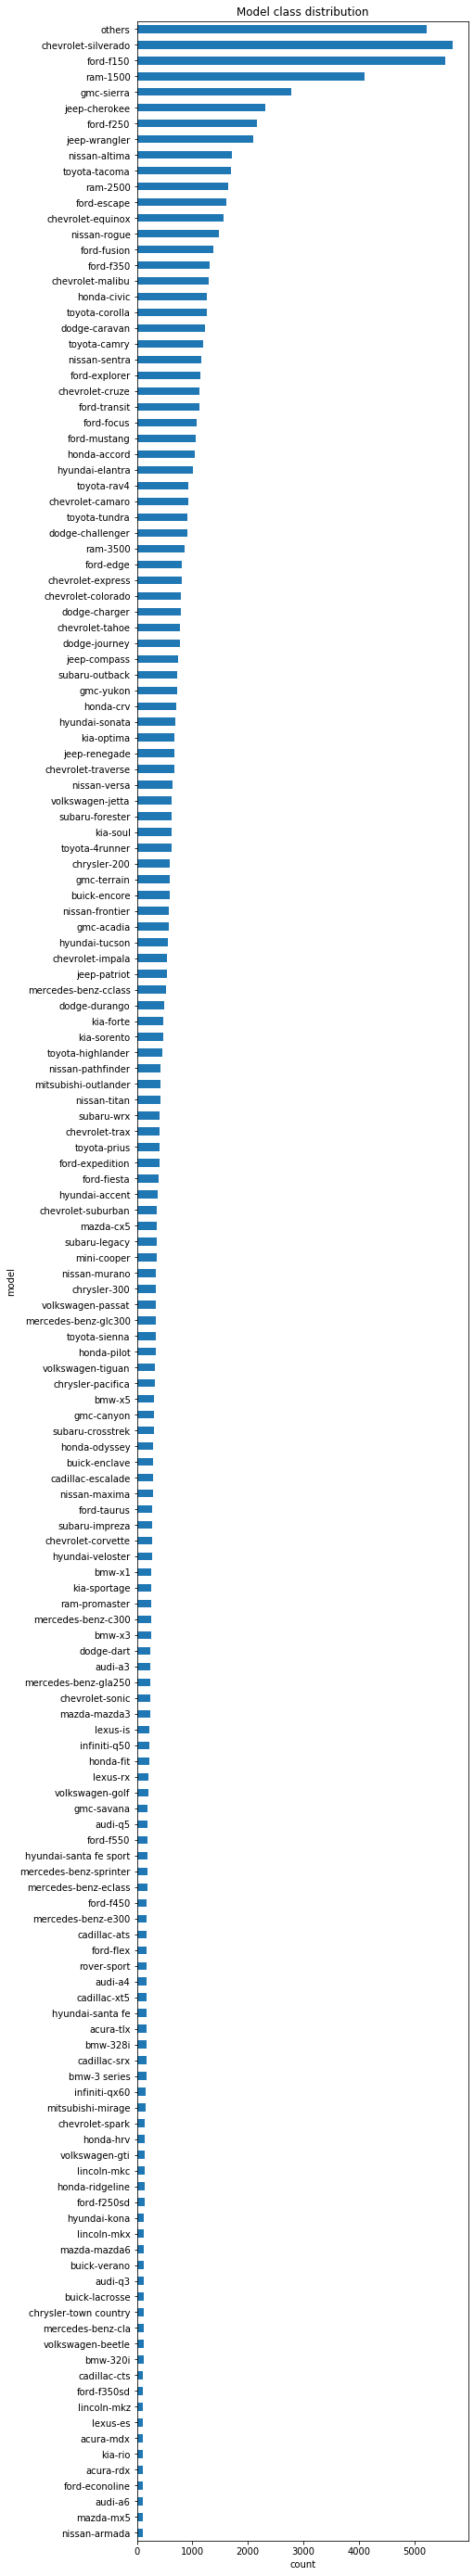

In [81]:
plot_class_distribution(concat_df, 'model', fig_size=(6.4, 50), others_threshold=100,
                        kind='barh', filename=os.path.join(fig_dir, 'model_distribution.jpg'))

After plotting the rest of the nominal features, it can be observed that these are imbalanced as well. Unlike the car model feature, however, these barely compare in the scale of its effect on the price so this imbalance can be safely ignored.

In [3]:
concat_df = pd.read_csv(os.path.join(data_dir, 'vehicles_concat.csv'))

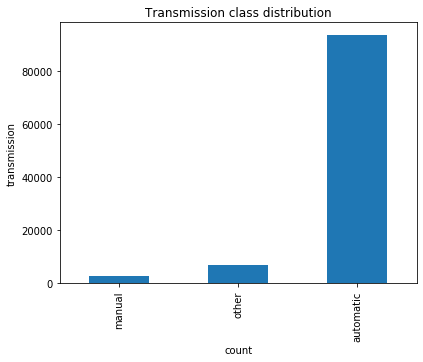

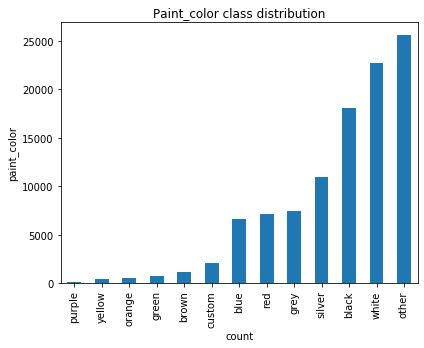

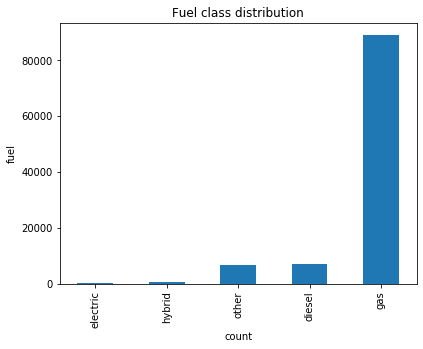

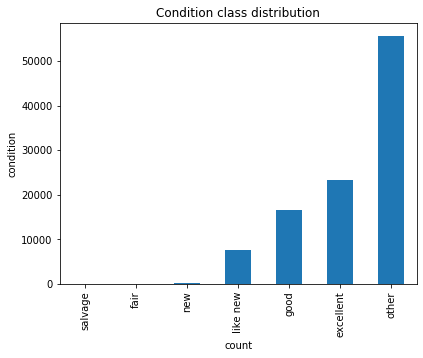

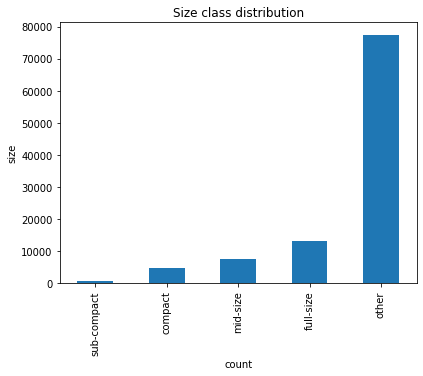

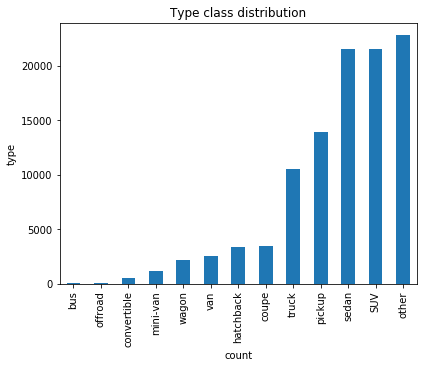

In [8]:
distribution_features = ['transmission', 'paint_color', 'fuel', 'condition', 'size', 'type']

for feature in distribution_features:
    plot_class_distribution(concat_df, feature, filename=os.path.join(fig_dir, '{}_distribution.jpg'.format(feature)))

## What's next

In the next notebook, we will tackle pre-processing which will consist of tasks like solving class imbalance, one-hot encoding nominal features, and splitting the dataset into a train, validation, and test set.